### What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
    1.Clean_up skill column
    2.Calculate skill count based on job_title_short
    3.Calculate skill percentage
    4.Plot final findings

In [69]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast

#Loading dataset
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Changing job_posted_date to date time format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [70]:
# Creating a New DataFrame Only Include United States
df_us = df[df['job_country'] == 'United States']

In [71]:
# Creating a 
df_skills = df_us.explode('job_skills')

In [72]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by ='skill_count', ascending= False, inplace= True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [73]:
job_titles =  df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

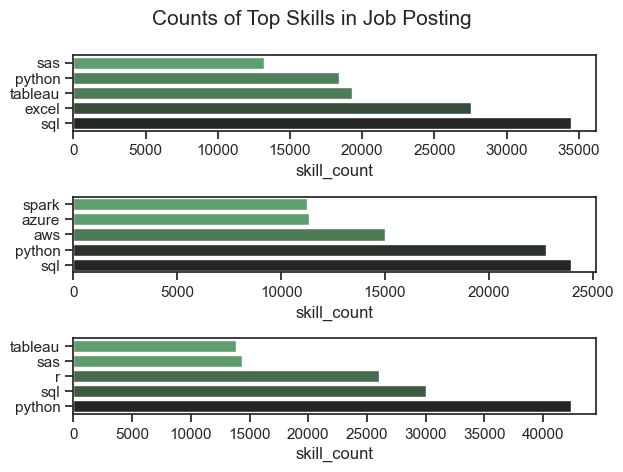

In [79]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind = 'barh', x ='job_skills', y ='skill_count', ax = ax[i], title = job_title)
    sns.barplot(data= df_plot, x = 'skill_count', y = 'job_skills', ax = ax[i], hue= 'skill_count', palette= 'dark:g_r')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Posting', fontsize = 15)
plt.tight_layout()
plt.show()

In [80]:
df_job_title_counts = df_us['job_title_short'].value_counts().reset_index(name = 'job_total')

In [81]:
df_skills_per = pd.merge(df_skills_count, df_job_title_counts, how = 'left', on = 'job_title_short')

df_skills_per['skill_percent'] = 100 * df_skills_per['skill_count'] / df_skills_per['job_total']

df_skills_per

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


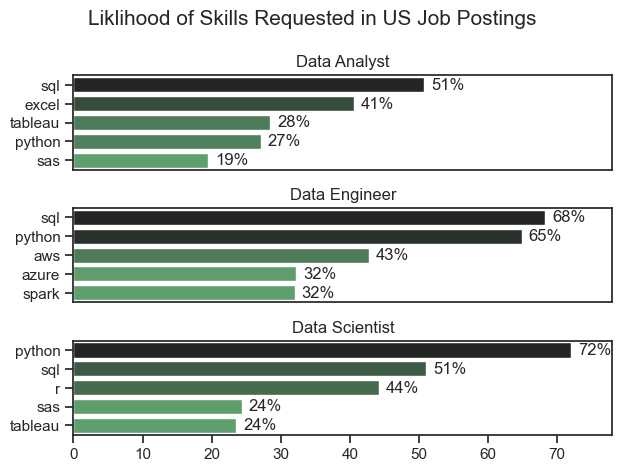

In [95]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style= 'ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_per[df_skills_per['job_title_short'] == job_title].head(5)
    sns.barplot(data= df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:g_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    for n, value in enumerate(df_plot['skill_percent']):
        ax[i].text(value + 1, n, f'{value:.0f}%', va = 'center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Liklihood of Skills Requested in US Job Postings', fontsize = 15)
plt.tight_layout()
plt.show()